In [ ]:
pip install scikit-learn pandas numpy joblib datasets


In [ ]:
import pandas as pd

# Public Telco Churn dataset
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"

df = pd.read_csv(url)

# Check first rows and columns
print(df.head())
print(df.columns.tolist())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
# Keep only rows where target is valid
df = df[df["Churn"].notna()]

# Map target: Yes -> 1, No -> 0
y = df["Churn"].map({"Yes": 1, "No": 0})

# Features: drop target and ID
X = df.drop(columns=["Churn", "customerID"])

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (7043, 19)
y shape: (7043,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

# Numerical transformer
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Categorical transformer
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, numerical_cols),
        ("cat", cat_transformer, categorical_cols)
    ]
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Pipelines
logreg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier())
])

# GridSearch for Random Forest
rf_param_grid = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20]
}

rf_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring="accuracy", n_jobs=-1)
rf_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='i...
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod',
                                                                          'TotalCharges'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
from sklearn.metrics import accuracy_score
import joblib

rf_best = rf_search.best_estimator_
rf_pred = rf_best.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Export model
joblib.dump(rf_best, "churn_model_rf.joblib")


Random Forest Accuracy: 0.7899219304471257


['churn_model_rf.joblib']

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Logistic Regression pipeline
logreg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Random Forest pipeline
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier())
])

# Hyperparameters for Logistic Regression
logreg_param_grid = {
    "classifier__C": [0.1, 1, 10],
    "classifier__solver": ["liblinear", "saga"]
}

# Hyperparameters for Random Forest
rf_param_grid = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20]
}

# GridSearch for Logistic Regression
logreg_search = GridSearchCV(logreg_pipeline, logreg_param_grid, cv=5, scoring="accuracy", n_jobs=-1)
logreg_search.fit(X_train, y_train)

# GridSearch for Random Forest
rf_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring="accuracy", n_jobs=-1)
rf_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='i...
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod',
                                                                          'TotalCharges'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
from sklearn.metrics import accuracy_score

# Logistic Regression
logreg_best = logreg_search.best_estimator_
logreg_pred = logreg_best.predict(X_test)
logreg_acc = accuracy_score(y_test, logreg_pred)

# Random Forest
rf_best = rf_search.best_estimator_
rf_pred = rf_best.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print(f"Logistic Regression Accuracy: {logreg_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")


Logistic Regression Accuracy: 0.8240
Random Forest Accuracy: 0.7857


In [ ]:
import joblib

# Suppose Random Forest performed better
joblib.dump(rf_best, "churn_model_rf.joblib")
print("Random Forest model exported as churn_model_rf.joblib")


Random Forest model exported as churn_model_rf.joblib


In [ ]:
# Example new customer record (dictionary)
new_customer = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 12,
    "PhoneService": "Yes",
    "MultipleLines": "No",
    "InternetService": "Fiber optic",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "Yes",
    "StreamingMovies": "Yes",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 75.5,
    "TotalCharges": 910.5
}

# Convert to DataFrame
import pandas as pd
new_df = pd.DataFrame([new_customer])

# Predict churn
prediction = rf_best.predict(new_df)
prediction_prob = rf_best.predict_proba(new_df)[:, 1]

print(f"Predicted Churn (0=No, 1=Yes): {prediction[0]}")
print(f"Probability of Churn: {prediction_prob[0]:.2f}")


Predicted Churn (0=No, 1=Yes): 0
Probability of Churn: 0.47


/tmp/ipython-input-430551508.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


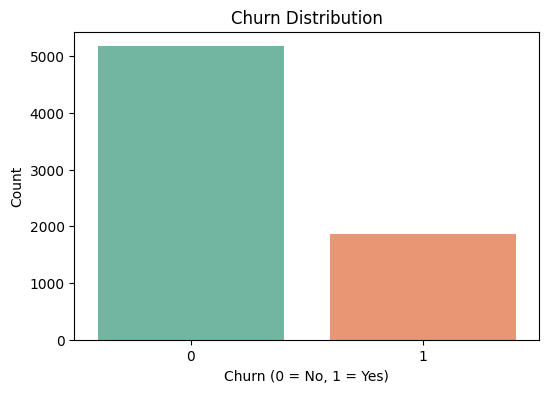

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# 1. Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="Set2")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()





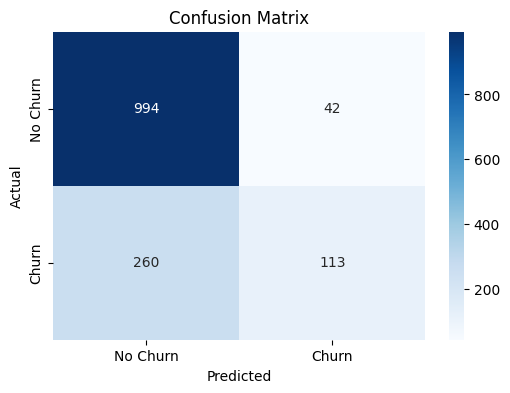

In [ ]:
# 2. Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [ ]:
# Print Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, rf_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1036
           1       0.73      0.30      0.43       373

    accuracy                           0.79      1409
   macro avg       0.76      0.63      0.65      1409
weighted avg       0.78      0.79      0.75      1409



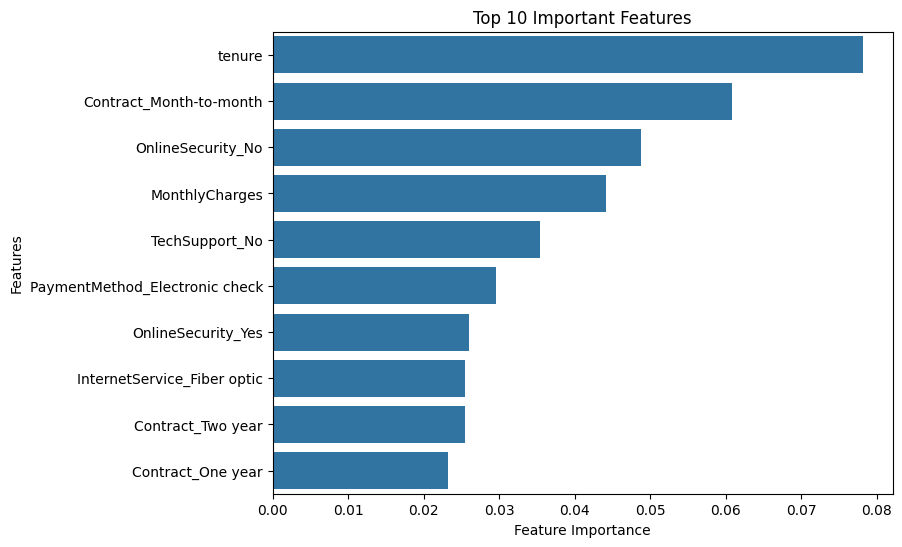

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get numerical feature names
num_features = numerical_cols

# Get categorical feature names after one-hot encoding
cat_features = rf_best.named_steps["preprocessor"].transformers_[1][1]["onehot"].get_feature_names_out(categorical_cols)

# Combine all feature names
feature_names = np.concatenate([num_features, cat_features])

# Get feature importances from Random Forest
importances = rf_best.named_steps["classifier"].feature_importances_

# Create a DataFrame for plotting
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:10]

# Plot top 10 features
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()



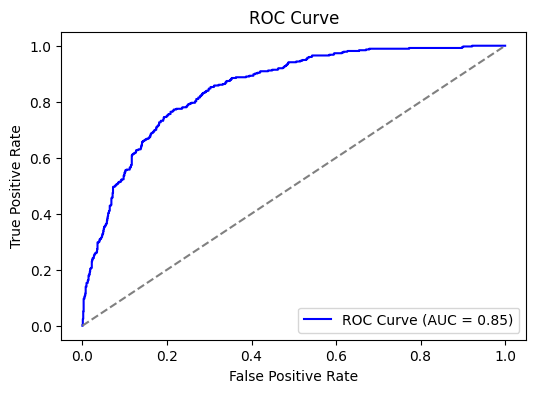

In [ ]:
# 4. ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_best.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

